In [1]:
from glob import glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit

### 4.2.1 Dark Current

In [2]:
all_dark_fits = glob("./DarkMeasurements/dark*.fits")
all_bias_fits = glob("./DarkMeasurements/bias*.fits")

print(all_dark_fits)

['./DarkMeasurements\\dark_0000.fits', './DarkMeasurements\\dark_0001.fits', './DarkMeasurements\\dark_0002.fits', './DarkMeasurements\\dark_0003.fits', './DarkMeasurements\\dark_0004.fits', './DarkMeasurements\\dark_0005.fits', './DarkMeasurements\\dark_0006.fits', './DarkMeasurements\\dark_0007.fits', './DarkMeasurements\\dark_0008.fits', './DarkMeasurements\\dark_0009.fits', './DarkMeasurements\\dark_0010.fits', './DarkMeasurements\\dark_0011.fits', './DarkMeasurements\\dark_0012.fits', './DarkMeasurements\\dark_0013.fits', './DarkMeasurements\\dark_0014.fits', './DarkMeasurements\\dark_0015.fits', './DarkMeasurements\\dark_0016.fits', './DarkMeasurements\\dark_0017.fits', './DarkMeasurements\\dark_0018.fits', './DarkMeasurements\\dark_0019.fits', './DarkMeasurements\\dark_0020.fits', './DarkMeasurements\\dark_0021.fits', './DarkMeasurements\\dark_0022.fits', './DarkMeasurements\\dark_0023.fits', './DarkMeasurements\\dark_0024.fits', './DarkMeasurements\\dark_0025.fits', './DarkMeas

In [3]:
temperatures = []

for path in all_dark_fits:
    hdul = fits.open(path)
    #hdul.info()
    temperatures.append(hdul[0].header['CCDTEMP'])
    image = hdul[0].data
    print("Opening image ", path)
    print("Dimension of data: ", image.shape)
    overscan_region = image[:,1030:]
    print('Dimension of or: ', overscan_region.shape)
    #rint("Printing original image:")
    #print(image)
    #rint("Printing overscan region")
    #rint(overscan_region)
    
    median_bias = np.median(overscan_region)
    std_bias = np.std(overscan_region)
    print(median_bias)
    print(std_bias)
    
    corrected_image = image - median_bias
    print(corrected_image)
    fits.writeto("./DarkMeasurements/BiasCorrected/" +path[18:28] + "_bias_corrected" + path[28:], corrected_image, overwrite=True)

Opening image  ./DarkMeasurements\dark_0000.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3782.0
53.25095310128325
[[  -89. -3260. -2147. ...    68.    74.    95.]
 [ 3304.   329.  1144. ...    70.    45.    91.]
 [ 3247.   370.  1112. ...    52.    64.   110.]
 ...
 [ 2223.  -347.   455. ...    97.   123.   153.]
 [ 2231.  -365.   458. ...    85.    68.   109.]
 [ 2125.  -323.   415. ...   103.    95.   118.]]
Opening image  ./DarkMeasurements\dark_0001.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3797.0
44.90229490475116
[[ -662. -3661. -2613. ...    44.    87.    64.]
 [ 3087.   155.   960. ...    21.    90.    37.]
 [ 3058.   230.   894. ...    32.    73.    78.]
 ...
 [ 2036.  -356.   368. ...    55.   111.    84.]
 [ 2058.  -371.   343. ...    67.   119.    88.]
 [ 2072.  -341.   312. ...    60.   111.    93.]]
Opening image  ./DarkMeasurements\dark_0002.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3805.0
40.1271445

3874.0
27.664465231884787
[[1973. -596.   71. ...   -7.  -36.   46.]
 [1451. -585.   69. ...    0.  -22.    2.]
 [1445. -562.   52. ...  -18.  -49.   26.]
 ...
 [1439. -567.   46. ...    7.  -12.   10.]
 [1435. -562.   75. ...    2.  -16.    8.]
 [1421. -540.   63. ...   26.  -28.   40.]]
Opening image  ./DarkMeasurements\dark_0021.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.655223921195333
[[ 2.077e+03 -5.430e+02  1.330e+02 ... -1.200e+01 -7.600e+01  8.000e+00]
 [ 1.481e+03 -5.530e+02  7.300e+01 ... -4.000e+00 -1.100e+01  0.000e+00]
 [ 1.484e+03 -5.320e+02  6.300e+01 ...  2.000e+00 -2.200e+01  1.200e+01]
 ...
 [ 1.480e+03 -5.380e+02  4.800e+01 ...  2.900e+01 -3.800e+01  4.900e+01]
 [ 1.460e+03 -5.640e+02  5.400e+01 ...  1.000e+00  2.100e+01  6.400e+01]
 [ 1.450e+03 -5.830e+02  4.900e+01 ...  2.000e+00 -2.500e+01  2.700e+01]]
Opening image  ./DarkMeasurements\dark_0022.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.75865464

Opening image  ./DarkMeasurements\dark_0037.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3871.0
28.42280327604852
[[   42. -2293. -1587. ...     0.   -56.    30.]
 [ 1314.  -598.     0. ...   -53.    37.     4.]
 [ 1332.  -542.   -10. ...    -5.   -42.    52.]
 ...
 [ 1366.  -591.    68. ...   -18.     8.    24.]
 [ 1317.  -578.    32. ...   -17.   -23.    22.]
 [ 1352.  -557.    41. ...    -3.     3.    42.]]
Opening image  ./DarkMeasurements\dark_0038.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3871.0
28.397589620827773
[[1945. -491.  135. ...    0.  -40.   17.]
 [1265. -543.  -12. ...   11.  -58.   14.]
 [1317. -586.   16. ...  -27.  -50.  -17.]
 ...
 [1353. -579.   34. ...  -21.  -35.   48.]
 [1382. -559.   28. ...   -5.  -23.   33.]
 [1363. -546.   29. ...   -6.  -37.    0.]]
Opening image  ./DarkMeasurements\dark_0039.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3870.0
28.368156953980357
[[1907. -504.  112. ...  -

Dimension of or:  (1024, 20)
3859.0
28.748472550948875
[[1777. -515.   37. ...  -45.  -36.   -3.]
 [1222. -530.  -14. ...  -42.   32.   26.]
 [1199. -520.   -5. ...  -43.  -40.   59.]
 ...
 [1203. -469.   35. ...   29.  -47.   39.]
 [1250. -512.    9. ...    9.   -4.   22.]
 [1258. -491.    8. ...  -13.  -39.   46.]]
Opening image  ./DarkMeasurements\dark_0057.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3856.0
27.928185972215697
[[1705. -533.  -50. ...   14.  -57.  -17.]
 [1175. -478.  -41. ...   29.  -11.  -10.]
 [1202. -487.  -53. ...   29.   -4.  -38.]
 ...
 [1273. -484.  -25. ...   13.    3.  -22.]
 [1293. -520.  -48. ...   27.  -29.  -14.]
 [1286. -507.  -38. ...   -9.   12.  -33.]]


In [4]:
for path in all_bias_fits:
    hdul = fits.open(path)
    image = hdul[0].data
    print("Opening image ", path)
    print(image.shape)
    print(image)

Opening image  ./DarkMeasurements\bias_0000.fits
(1024, 1050)
[[6220 3818 4491 ... 3926 3908 3900]
 [5567 3332 3988 ... 3877 3917 3940]
 [5524 3342 3963 ... 3908 3931 3949]
 ...
 [5578 3358 3942 ... 3871 3937 3907]
 [5578 3343 3974 ... 3901 3922 3932]
 [5530 3332 3980 ... 3882 3924 3954]]
Opening image  ./DarkMeasurements\bias_0001.fits
(1024, 1050)
[[6194 3641 4270 ... 3934 3925 3875]
 [5615 3280 3944 ... 3905 3922 3895]
 [5621 3298 3969 ... 3954 3918 3884]
 ...
 [5554 3333 3919 ... 3943 3905 3888]
 [5532 3311 3957 ... 3930 3915 3892]
 [5526 3314 3912 ... 3949 3904 3889]]
Opening image  ./DarkMeasurements\bias_0002.fits
(1024, 1050)
[[6142 3586 4234 ... 3908 3853 3923]
 [5588 3241 3969 ... 3865 3876 3937]
 [5602 3277 3943 ... 3870 3891 3879]
 ...
 [5539 3316 3953 ... 3898 3876 3953]
 [5556 3270 3929 ... 3890 3888 3955]
 [5546 3284 3999 ... 3878 3876 3923]]
Opening image  ./DarkMeasurements\bias_0003.fits
(1024, 1050)
[[6052 3552 4206 ... 3884 3860 3927]
 [5503 3244 3965 ... 3886 3840 

Opening image  ./DarkMeasurements\bias_0038.fits
(1024, 1050)
[[5921 3426 3962 ... 3887 3878 3856]
 [5273 3309 3871 ... 3907 3885 3811]
 [5227 3331 3821 ... 3893 3837 3856]
 ...
 [5178 3354 3832 ... 3909 3879 3850]
 [5167 3394 3849 ... 3898 3868 3853]
 [5184 3350 3847 ... 3897 3875 3829]]
Opening image  ./DarkMeasurements\bias_0039.fits
(1024, 1050)
[[5859 3462 3985 ... 3830 3879 3894]
 [5206 3353 3852 ... 3829 3896 3877]
 [5222 3359 3847 ... 3825 3885 3865]
 ...
 [5149 3372 3851 ... 3829 3930 3860]
 [5213 3371 3850 ... 3857 3936 3850]
 [5223 3391 3866 ... 3861 3902 3854]]
Opening image  ./DarkMeasurements\bias_0040.fits
(1024, 1050)
[[5878 3455 3988 ... 3892 3875 3831]
 [5186 3339 3877 ... 3934 3850 3819]
 [5191 3367 3839 ... 3904 3870 3861]
 ...
 [5202 3351 3861 ... 3897 3864 3863]
 [5210 3358 3832 ... 3882 3833 3853]
 [5215 3367 3853 ... 3915 3876 3856]]
Opening image  ./DarkMeasurements\bias_0041.fits
(1024, 1050)
[[3877 1580 2181 ... 3830 3884 3865]
 [5193 3349 3834 ... 3860 3913 

In [5]:
all_bc_dark_fits = glob("./DarkMeasurements/BiasCorrected/dark*_bias_corrected.fits")
print(all_bc_dark_fits)

['./DarkMeasurements/BiasCorrected\\dark_0000_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0001_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0002_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0003_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0004_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0005_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0006_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0007_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0008_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0009_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0010_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0011_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0012_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0013_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0014_bias_corrected.f

In [6]:
dark_medians = []
dark_errors = []

for path in all_bc_dark_fits:
    hdul = fits.open(path)
    image = hdul[0].data
    median_dark = np.median(image[:,:1000])
    std_dark = np.std(image[:,:1000])
    dark_medians.append(median_dark)
    dark_errors.append(std_dark)
    
print(dark_medians)
print(dark_errors)

def dark_current(T, A, Eg):
    return A * T**(3/2) * np.exp(-Eg / (2*(sc.k/sc.e)*T))

print(sc.k/sc.e)

[1092.0, 917.0, 774.0, 655.0, 553.0, 468.0, 396.0, 334.0, 282.0, 236.0, 199.0, 172.0, 141.0, 122.0, 103.0, 87.0, 70.0, 60.0, 52.0, 42.0, 35.0, 29.0, 24.0, 22.0, 15.0, 16.0, 9.0, 8.0, 9.0, 4.0, 6.0, 1.0, 1.0, 1.0, -1.0, -1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -2.0, -2.0, 0.0, -2.0, -3.0, -4.0, -2.0, -4.0, -4.0, 0.0, -4.0, -3.0, 0.0, -3.0, -4.0, -3.0, -1.0]
[167.62205253313485, 148.3210047774509, 132.55600136669625, 118.97866467526819, 107.9238990492986, 98.87478435198345, 91.37581993868389, 85.34105270144768, 80.73087885385155, 76.62794665892136, 73.03328396012415, 70.30873476978839, 68.24328126606468, 66.34052088608408, 64.73545628401504, 63.54929021966982, 62.37007412740471, 61.859362548300346, 60.51055993951883, 60.40466288571647, 59.77445125010424, 59.25048756687234, 58.72645016329476, 57.82503467107506, 57.69602814477404, 57.186106598417936, 56.88914512799846, 57.200568906260536, 56.526677330609886, 56.195558324438494, 56.00833950128818, 55.74660207263069, 56.114404542333176, 55.99414609

35.0
21.952626649839065
Eg =  1.3809563309855024 +- 0.007747321390123165


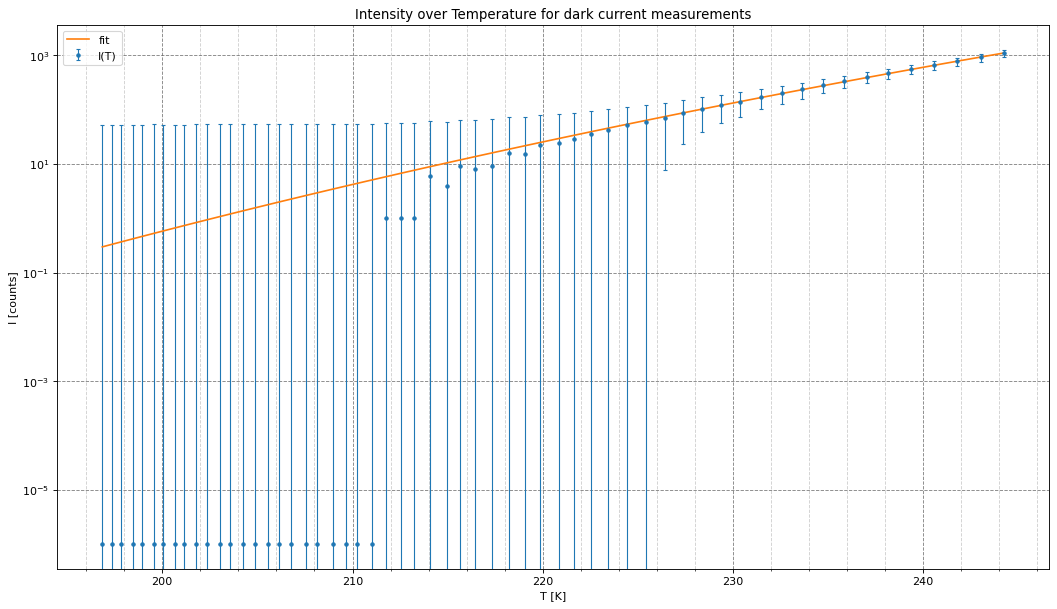

In [7]:
temperatures_np = np.asarray(temperatures)
temperatures_np = temperatures_np + 273.15

for i in range(len(dark_medians)):
    if dark_medians[i] <= 0:
        dark_medians[i] = 10**(-6)
print(dark_medians[20])
print(dark_current(220, 100000000000, 1.15))
popt_dc, pcov_dc = curve_fit(dark_current, temperatures_np, dark_medians, sigma=dark_errors, p0=[100000000000, 1.15])

plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(temperatures_np,dark_medians, yerr = dark_errors, linestyle='None', marker = ".", label="I(T)", capsize = 2, elinewidth=1)
plt.plot(temperatures_np, dark_current(temperatures_np, *popt_dc), label="fit")
#plt.plot(temperatures_np, dark_current(temperatures_np, 100000000000, 1.15))
plt.xlabel('T [K]')
plt.ylabel('I [counts]')
plt.title('Intensity over Temperature for dark current measurements')
plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

print("Eg = ", popt_dc[1], "+-", np.sqrt(pcov_dc[1,1]))

### 4.2.2 Flat-field

In [8]:
flats_B = glob("./FlatFieldMeasurements/flats_B*.fits")
flats_R = glob("./FlatFieldMeasurements/flats_R*.fits")
flats_V = glob("./FlatFieldMeasurements/flats_V*.fits")
flats_paths = [flats_B, flats_R, flats_V]
print(flats_paths)

[['./FlatFieldMeasurements\\flats_B0000.fits', './FlatFieldMeasurements\\flats_B0001.fits', './FlatFieldMeasurements\\flats_B0002.fits', './FlatFieldMeasurements\\flats_B0003.fits', './FlatFieldMeasurements\\flats_B0004.fits'], ['./FlatFieldMeasurements\\flats_R0000.fits', './FlatFieldMeasurements\\flats_R0001.fits', './FlatFieldMeasurements\\flats_R0002.fits', './FlatFieldMeasurements\\flats_R0003.fits', './FlatFieldMeasurements\\flats_R0004.fits'], ['./FlatFieldMeasurements\\flats_V0000.fits', './FlatFieldMeasurements\\flats_V0001.fits', './FlatFieldMeasurements\\flats_V0002.fits', './FlatFieldMeasurements\\flats_V0003.fits', './FlatFieldMeasurements\\flats_V0004.fits']]


2498.0
442.11356911059056
2493.0
439.7041839985691
2493.0
442.3693390601564
2478.0
444.3148681859872
2481.0
446.11378803523905
[[ 1316. -2493. -2373. ... 11096. 11115. 11023.]
 [12455.  5652.  7904. ... 11196. 11190. 11123.]
 [13461.  5882.  8412. ... 11264. 11239. 11221.]
 ...
 [ 2671.   951.  1467. ...  1405.  1412.  1400.]
 [ 2665.   939.  1452. ...  1404.  1400.  1394.]
 [ 2678.   956.  1456. ...  1382.  1410.  1385.]]
12874.0
[[ 0.10222153 -0.19364611 -0.184325   ...  0.86189219  0.86336803
   0.85622184]
 [ 0.96745378  0.43902439  0.6139506  ...  0.86965978  0.86919372
   0.86398944]
 [ 1.04559577  0.45688986  0.65340997 ...  0.87494174  0.87299984
   0.87160168]
 ...
 [ 0.20747243  0.07386982  0.1139506  ...  0.10913469  0.10967842
   0.10874631]
 [ 0.20700637  0.0729377   0.11278546 ...  0.10905701  0.10874631
   0.10828025]
 [ 0.20801616  0.07425819  0.11309616 ...  0.10734814  0.10952307
   0.10758117]]
2498.0
431.87922458407263
2501.0
430.73624141299683
2495.0
432.6715360976

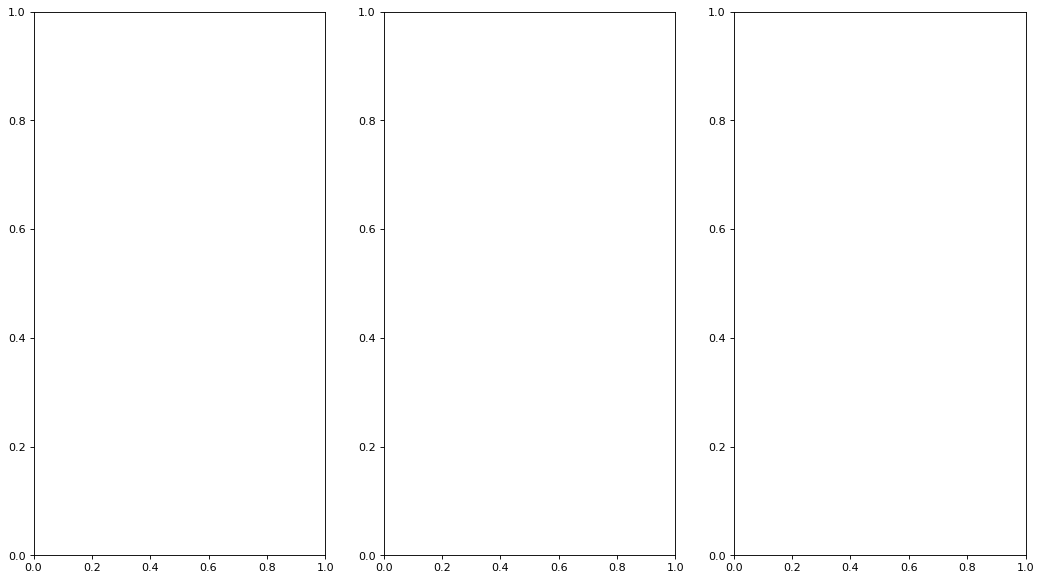

In [9]:
plt.figure(figsize=(16,9), dpi=80)

i = 0
for pathlist in flats_paths:
    corrected_images = []
    for path in pathlist:
        hdul = fits.open(path)
        image = hdul[0].data
        overscan_region = image[:,1030:]

        median_bias = np.median(overscan_region)
        std_bias = np.std(overscan_region)
        print(median_bias)
        print(std_bias)
        
        corrected_image = image - median_bias
        corrected_images.append(corrected_image)
    
    corrected_images_np = np.asarray(corrected_images)
    master_image = np.median(corrected_images_np[:,:,:1000], axis=0)
    print(master_image)
    master_median = np.median(master_image)
    print(master_median)
    master_image_normalized = master_image / master_median
    print(master_image_normalized)
    plt.subplot(1, 3, i+1)
    #plt.hist(master_image_normalized, bins=100)
    
    i+=1